In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step1: Leftover Preprocessing, Data Cleaning and Feature Engineering

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('/content/drive/MyDrive/Food Waste Management System/HostelFoodWasteManagement_Raw2.xlsx')
print("Shape:", df.shape)
print(df.head())

Shape: (7046, 21)
        date day_of_week  week_number  month  is_weekend  is_holiday  \
0 2018-07-01      Sunday           26      7           1           0   
1 2018-07-01      Sunday           26      7           1           0   
2 2018-07-01      Sunday           26      7           1           0   
3 2018-07-02      Monday           27      7           0           0   
4 2018-07-02      Monday           27      7           0           0   

   is_vacation_period  is_event_day event_type  meal_type  ...  \
0                   0             0        NaN     Brunch  ...   
1                   0             0        NaN     Snacks  ...   
2                   0             0        NaN     Dinner  ...   
3                   0             0        NaN  Breakfast  ...   
4                   0             0        NaN      Lunch  ...   

  hostel_capacity  students_present  students_absent  food_prepared_kg  \
0             780               610              170            395.97   
1   

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['is_weekend'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)
print("Weekends marked:", df['is_weekend'].sum())

Weekends marked: 1830


In [ ]:
# Label Encoding for menu_category
le = LabelEncoder()
df['menu_category_encoded'] = le.fit_transform(df['menu_category'])
df.drop(columns=['menu_category'], inplace=True)

# One-Hot Encoding for meal_type
df = pd.get_dummies(df, columns=['meal_type'], prefix='meal')

# One-Hot Encoding for event_type (drop event_None)
df = pd.get_dummies(df, columns=['event_type'], prefix='event')
if 'event_None' in df.columns:
    df.drop(columns=['event_None'], inplace=True)

# Convert booleans to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Encode day_of_week ordinally
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
df['day_of_week_encoded'] = df['day_of_week'].cat.codes
df.drop(columns=['day_of_week'], inplace=True)

# Drop date column
df.drop(columns=['date'], inplace=True)

print("Final Shape:", df.shape)
print("Columns:", df.columns.tolist())

Final Shape: (7046, 25)
Columns: ['week_number', 'month', 'is_weekend', 'is_holiday', 'is_vacation_period', 'is_event_day', 'hostel_capacity', 'students_present', 'students_absent', 'food_prepared_kg', 'food_wasted_kg', 'food_consumed_kg', 'prev_day_same_meal_consumed_kg', 'last_7_days_avg_consumed_kg', 'last_7_days_avg_wasted_kg', 'target_food_required_kg', 'menu_category_encoded', 'meal_Breakfast', 'meal_Brunch', 'meal_Dinner', 'meal_Lunch', 'meal_Snacks', 'event_College_Event', 'event_Festival', 'day_of_week_encoded']


In [ ]:
output_path = '/content/drive/MyDrive/Food Waste Management System/hostel_food_waste_preprocessed_v2.xlsx'
df.to_excel(output_path, index=False)
print("Saved to Drive ")

from google.colab import files
df.to_excel('hostel_food_waste_preprocessed_v2.xlsx', index=False)
files.download('hostel_food_waste_preprocessed_v2.xlsx')

Saved to Drive 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step2: EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(df.describe())
print("\nMissing values:\n", df.isnull().sum())

       week_number        month   is_weekend   is_holiday  is_vacation_period  \
count  7046.000000  7046.000000  7046.000000  7046.000000         7046.000000   
mean     26.499858     6.520011     0.259722     0.065001            0.420948   
std      14.981709     3.449538     0.438513     0.246546            0.493746   
min       1.000000     1.000000     0.000000     0.000000            0.000000   
25%      14.000000     4.000000     0.000000     0.000000            0.000000   
50%      26.000000     7.000000     0.000000     0.000000            0.000000   
75%      39.000000    10.000000     1.000000     0.000000            1.000000   
max      52.000000    12.000000     1.000000     1.000000            1.000000   

       is_event_day  hostel_capacity  students_present  students_absent  \
count   7046.000000      7046.000000       7046.000000      7046.000000   
mean       0.021431       814.600199        458.558757       356.041442   
std        0.144825        26.685490        2

/tmp/ipython-input-2644368363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=meal_df, x='meal', y='avg_waste_kg', palette='Reds_r', ax=axes[0,0])
/tmp/ipython-input-2644368363.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_weekend', y='food_wasted_kg', palette='Set2', ax=axes[0,1])
/tmp/ipython-input-2644368363.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_holiday', y='food_wasted_kg', palette='Set1', ax=axes[1,1])


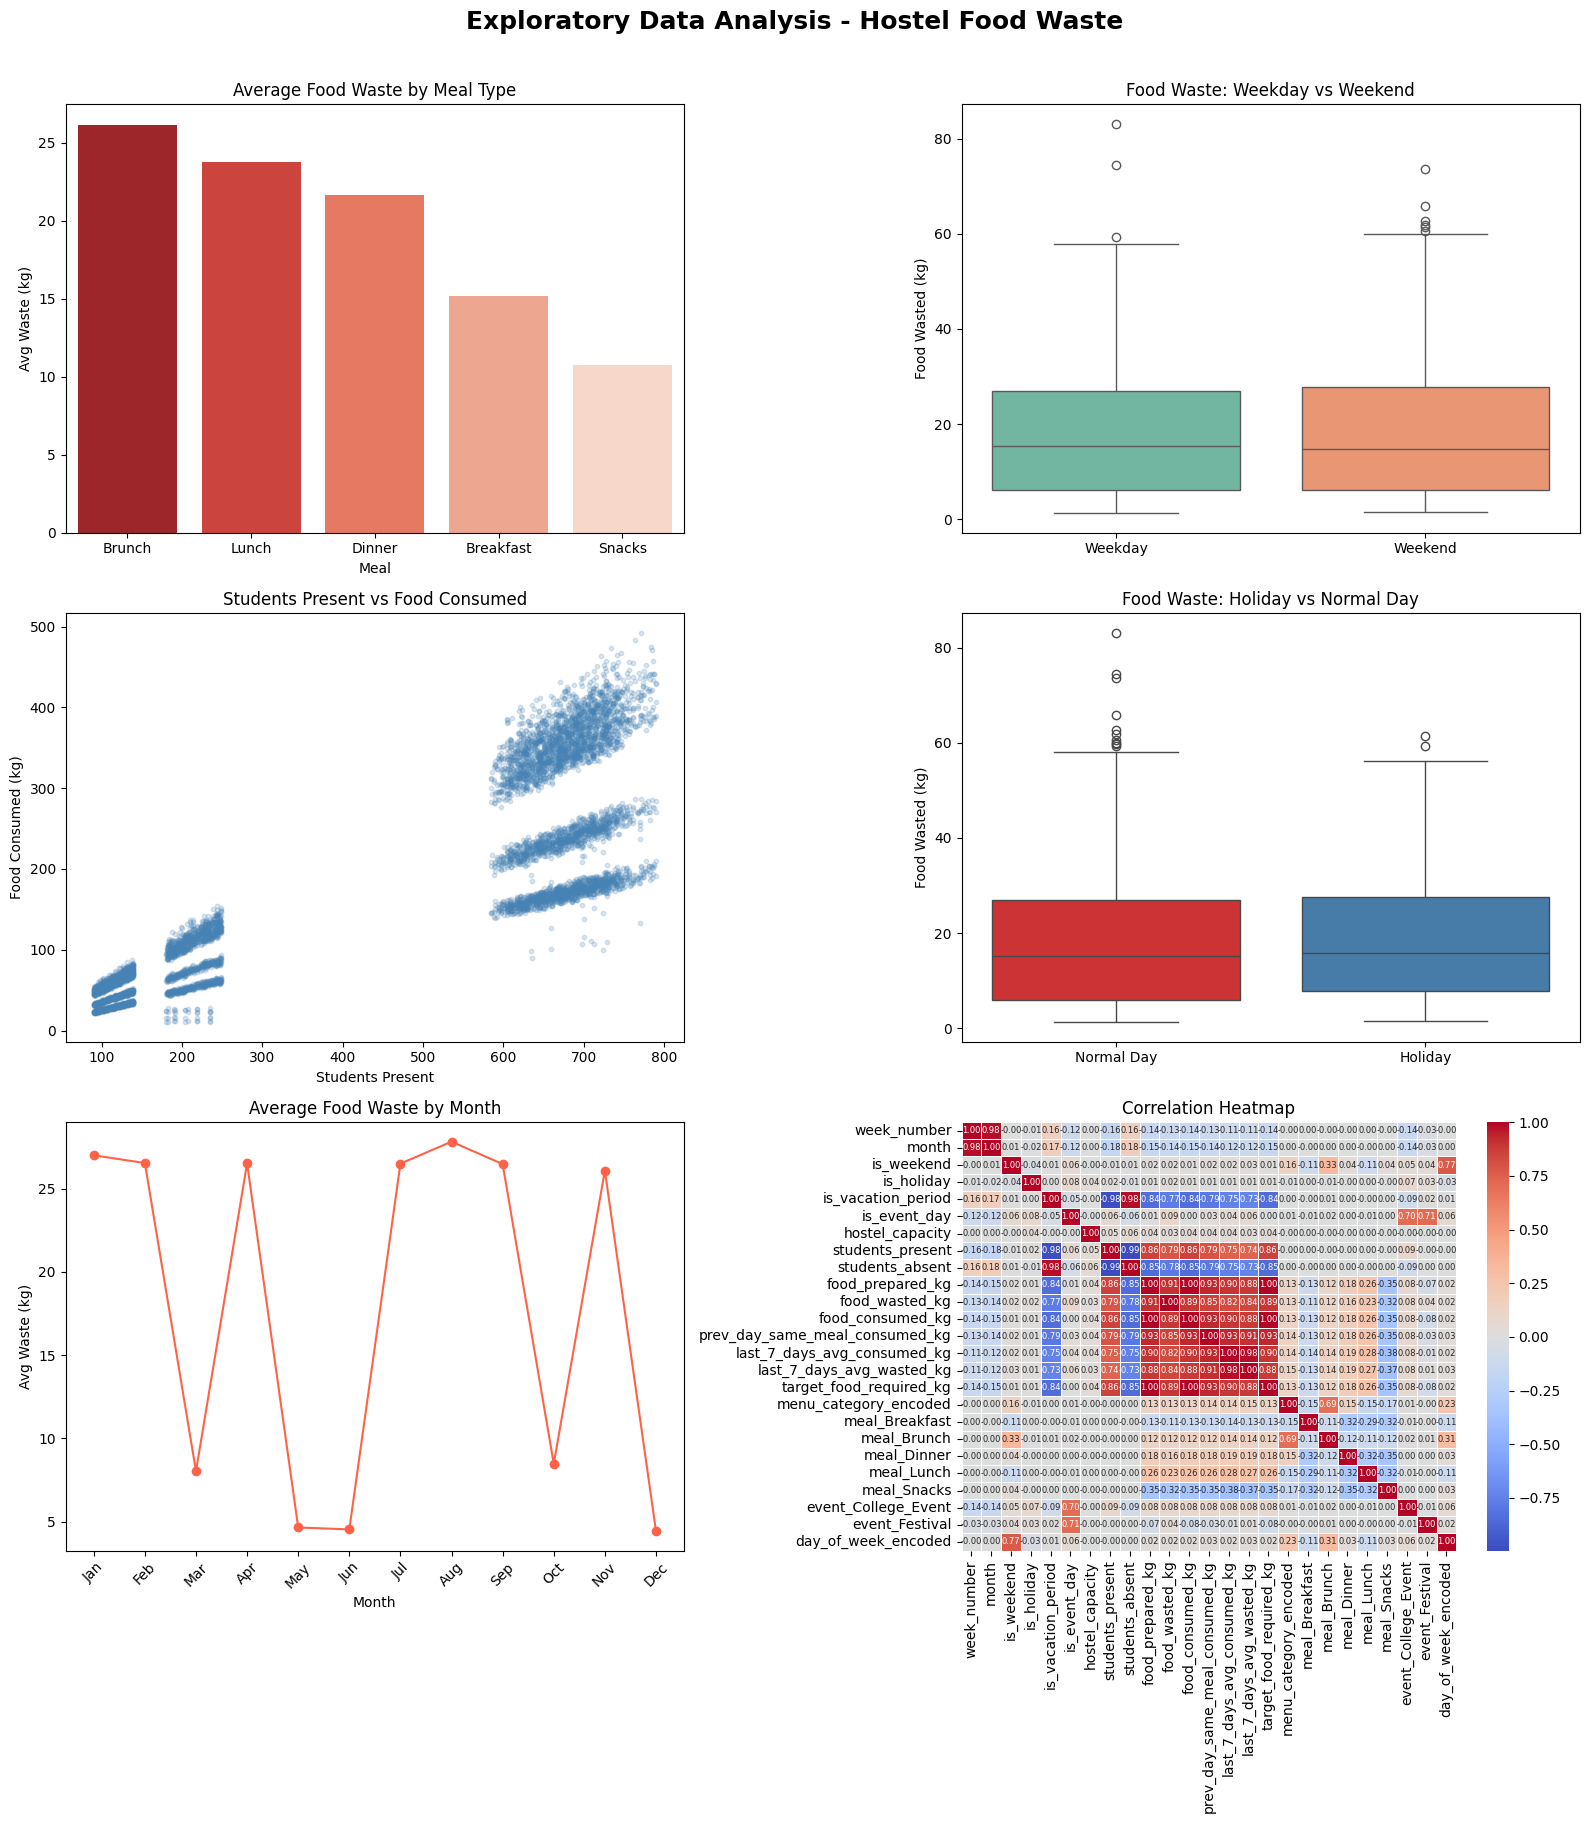

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Exploratory Data Analysis - Hostel Food Waste', fontsize=18, fontweight='bold', y=1.01)

# --- Plot 1: Average Food Waste by Meal Type ---
meal_cols = ['meal_Breakfast','meal_Lunch','meal_Snacks','meal_Dinner','meal_Brunch']
meal_waste = [{'meal': col.replace('meal_',''), 'avg_waste_kg': df[df[col]==1]['food_wasted_kg'].mean()} for col in meal_cols]
meal_df = pd.DataFrame(meal_waste).sort_values('avg_waste_kg', ascending=False)
sns.barplot(data=meal_df, x='meal', y='avg_waste_kg', palette='Reds_r', ax=axes[0,0])
axes[0,0].set_title('Average Food Waste by Meal Type')
axes[0,0].set_xlabel('Meal'); axes[0,0].set_ylabel('Avg Waste (kg)')

# --- Plot 2: Weekday vs Weekend ---
sns.boxplot(data=df, x='is_weekend', y='food_wasted_kg', palette='Set2', ax=axes[0,1])
axes[0,1].set_xticks([0,1]); axes[0,1].set_xticklabels(['Weekday','Weekend'])
axes[0,1].set_title('Food Waste: Weekday vs Weekend')
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel('Food Wasted (kg)')

# --- Plot 3: Attendance vs Consumption ---
axes[1,0].scatter(df['students_present'], df['food_consumed_kg'], alpha=0.2, color='steelblue', s=10)
axes[1,0].set_title('Students Present vs Food Consumed')
axes[1,0].set_xlabel('Students Present'); axes[1,0].set_ylabel('Food Consumed (kg)')

# --- Plot 4: Holiday Impact ---
sns.boxplot(data=df, x='is_holiday', y='food_wasted_kg', palette='Set1', ax=axes[1,1])
axes[1,1].set_xticks([0,1]); axes[1,1].set_xticklabels(['Normal Day','Holiday'])
axes[1,1].set_title('Food Waste: Holiday vs Normal Day')
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel('Food Wasted (kg)')

# --- Plot 5: Monthly Waste Trend ---
monthly = df.groupby('month')['food_wasted_kg'].mean().reset_index()
axes[2,0].plot(monthly['month'], monthly['food_wasted_kg'], marker='o', color='tomato')
axes[2,0].set_xticks(range(1,13))
axes[2,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
axes[2,0].set_title('Average Food Waste by Month')
axes[2,0].set_xlabel('Month'); axes[2,0].set_ylabel('Avg Waste (kg)')

# --- Plot 6: Correlation Heatmap ---
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, ax=axes[2,1], annot_kws={"size":6})
axes[2,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
df['prev_day_same_meal_consumed_kg'].fillna(df['last_7_days_avg_consumed_kg'], inplace=True)
print("Missing values remaining:", df['prev_day_same_meal_consumed_kg'].isnull().sum())

Missing values remaining: 0


/tmp/ipython-input-1914688994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prev_day_same_meal_consumed_kg'].fillna(df['last_7_days_avg_consumed_kg'], inplace=True)


Step3: Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['target_food_required_kg'])
y = df['target_food_required_kg']

# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Total samples:", len(df))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Total samples: 7046
Training samples: 5636
Testing samples: 1410

X_train shape: (5636, 24)
X_test shape: (1410, 24)


Step4: Model Selection


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': round(mean_absolute_error(y_test, y_pred), 4),
        'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
        'R2': round(r2_score(y_test, y_pred), 4)
    }

results_df = pd.DataFrame(results).T
print(results_df)

                      MAE    RMSE      R2
Linear Regression  2.0036  2.7306  0.9995
Random Forest      2.0881  2.9166  0.9995
XGBoost            2.2020  3.1821  0.9994


Step5: Training and Comparing

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.01))
    ]),
    'ElasticNet': Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNet(alpha=0.01, l1_ratio=0.5))
    ]),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        min_samples_split=5,
        subsample=0.8,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42,
        verbosity=0
    )
}

# Train and evaluate all models
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train,
                                cv=kf, scoring='r2', n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'MAE'        : round(mean_absolute_error(y_test, y_pred), 4),
        'RMSE'       : round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
        'R2'         : round(r2_score(y_test, y_pred), 4),
        'CV_R2_Mean' : round(cv_scores.mean(), 4),
        'CV_R2_Std'  : round(cv_scores.std(), 4)
    }
    print(f" {name} done")

results_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)
print("\n", results_df)

✅ Linear Regression done
✅ Ridge done
✅ Lasso done
✅ ElasticNet done
✅ Random Forest done
✅ Gradient Boosting done
✅ XGBoost done

                       MAE    RMSE      R2  CV_R2_Mean  CV_R2_Std
Linear Regression  2.0036  2.7306  0.9995      0.9996     0.0000
Ridge              2.0049  2.7321  0.9995      0.9996     0.0000
Lasso              2.0043  2.7318  0.9995      0.9996     0.0000
Gradient Boosting  2.0794  2.8761  0.9995      0.9995     0.0000
ElasticNet         2.4245  3.1990  0.9994      0.9994     0.0000
XGBoost            2.1047  3.0120  0.9994      0.9994     0.0001
Random Forest      2.9072  4.5346  0.9987      0.9987     0.0002


                           feature  coefficient  abs_coefficient
11                food_consumed_kg   249.863043       249.863043
9                 food_prepared_kg  -132.599733       132.599733
10                  food_wasted_kg    12.676610        12.676610
12  prev_day_same_meal_consumed_kg    -0.159715         0.159715
14       last_7_days_avg_wasted_kg     0.155554         0.155554
17                     meal_Brunch    -0.093769         0.093769
1                            month    -0.078650         0.078650
15           menu_category_encoded     0.067857         0.067857
21             event_College_Event    -0.055625         0.055625
4               is_vacation_period    -0.055156         0.055156
5                     is_event_day    -0.041169         0.041169
23             day_of_week_encoded     0.041025         0.041025
3                       is_holiday     0.033876         0.033876
13     last_7_days_avg_consumed_kg    -0.030880         0.030880
16                  meal_

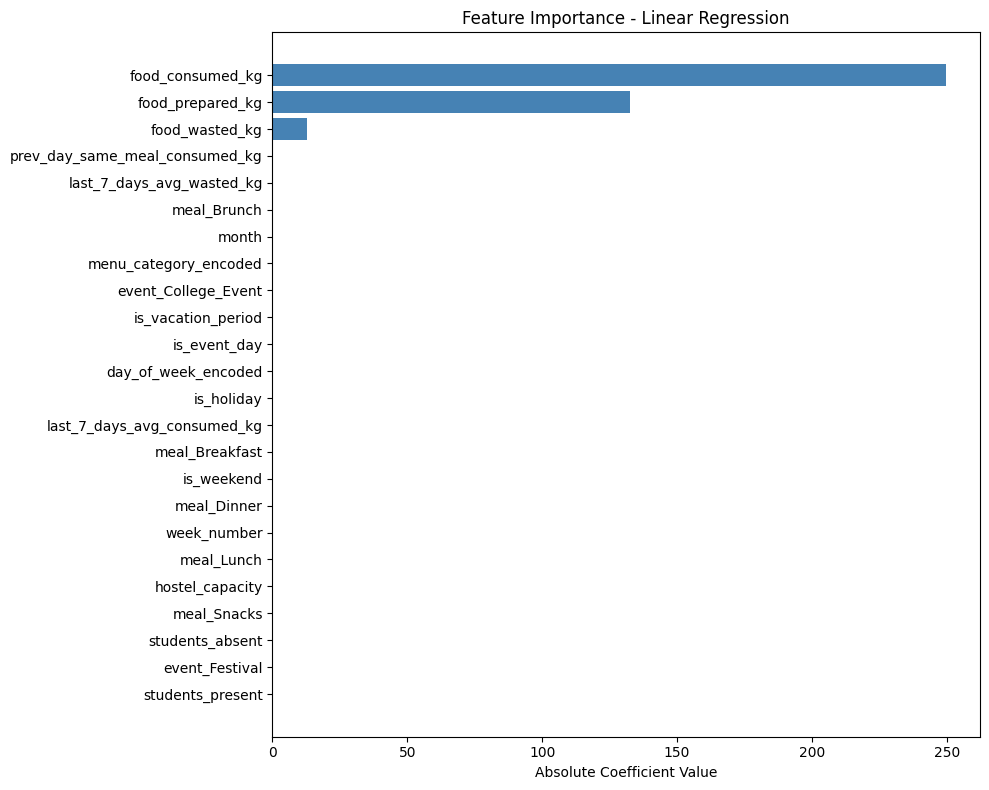

In [ ]:
#Feature importance
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients from the linear regression pipeline
lr_model = models['Linear Regression']
coefficients = lr_model.named_steps['model'].coef_
feature_names = X_train.columns.tolist()

# Create a dataframe of features and their coefficients
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print(importance_df)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['abs_coefficient'], color='steelblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance - Linear Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Training again

In [ ]:
# Dropping leaky columns
leaky_cols = ['food_consumed_kg', 'food_prepared_kg', 'food_wasted_kg', 'students_absent']

X_train_clean = X_train.drop(columns=leaky_cols)
X_test_clean = X_test.drop(columns=leaky_cols)

print("Features remaining:", X_train_clean.shape[1])
print(X_train_clean.columns.tolist())

Features remaining: 20
['week_number', 'month', 'is_weekend', 'is_holiday', 'is_vacation_period', 'is_event_day', 'hostel_capacity', 'students_present', 'prev_day_same_meal_consumed_kg', 'last_7_days_avg_consumed_kg', 'last_7_days_avg_wasted_kg', 'menu_category_encoded', 'meal_Breakfast', 'meal_Brunch', 'meal_Dinner', 'meal_Lunch', 'meal_Snacks', 'event_College_Event', 'event_Festival', 'day_of_week_encoded']


In [ ]:
# Retraining all models on clean data
results_clean = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_clean, y_train,
                                cv=kf, scoring='r2', n_jobs=-1)
    model.fit(X_train_clean, y_train)
    y_pred = model.predict(X_test_clean)

    results_clean[name] = {
        'MAE'        : round(mean_absolute_error(y_test, y_pred), 4),
        'RMSE'       : round(np.sqrt(mean_squared_error(y_test, y_pred)), 4),
        'R2'         : round(r2_score(y_test, y_pred), 4),
        'CV_R2_Mean' : round(cv_scores.mean(), 4),
        'CV_R2_Std'  : round(cv_scores.std(), 4)
    }
    print(f"Done: {name}")

results_clean_df = pd.DataFrame(results_clean).T.sort_values('R2', ascending=False)
print("\n", results_clean_df)

Done: Linear Regression
Done: Ridge
Done: Lasso
Done: ElasticNet
Done: Random Forest
Done: Gradient Boosting
Done: XGBoost

                        MAE     RMSE      R2  CV_R2_Mean  CV_R2_Std
Gradient Boosting   6.2650   9.3195  0.9946      0.9947     0.0007
XGBoost             6.3278   9.4119  0.9945      0.9947     0.0005
Random Forest       7.6405  12.1233  0.9909      0.9920     0.0013
Lasso              22.7536  29.7931  0.9451      0.9500     0.0032
Ridge              22.7517  29.8038  0.9451      0.9500     0.0032
Linear Regression  22.7443  29.8029  0.9451      0.9500     0.0032
ElasticNet         22.9366  29.9104  0.9447      0.9497     0.0032


Proceeding with Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_samples_split': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 0.8]
}

param_grid_focused = {
    'n_estimators': [200, 300],
    'learning_rate': [0.03, 0.05, 0.07],
    'max_depth': [4, 5, 6],
    'min_samples_split': [3, 5],
    'subsample': [0.8, 0.9],
}

gb_tuned = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_focused,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

gb_tuned.fit(X_train_clean, y_train)

print("Best parameters:", gb_tuned.best_params_)
print("Best CV R2:", round(gb_tuned.best_score_, 4))

# Evaluate on test set
y_pred_tuned = gb_tuned.predict(X_test_clean)
print("\nTuned Model Performance:")
print("MAE :", round(mean_absolute_error(y_test, y_pred_tuned), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_tuned)), 4))
print("R2  :", round(r2_score(y_test, y_pred_tuned), 4))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'learning_rate': 0.03, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 300, 'subsample': 0.8}
Best CV R2: 0.9948

Tuned Model Performance:
MAE : 6.3231
RMSE: 9.5552
R2  : 0.9944


In [ ]:
# Final model - retrain with original best parameters
final_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=5,
    subsample=0.8,
    random_state=42
)

final_model.fit(X_train_clean, y_train)
y_pred_final = final_model.predict(X_test_clean)

print("Final Model Performance:")
print("MAE :", round(mean_absolute_error(y_test, y_pred_final), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_final)), 4))
print("R2  :", round(r2_score(y_test, y_pred_final), 4))

Final Model Performance:
MAE : 6.265
RMSE: 9.3195
R2  : 0.9946


                           feature  importance
8   prev_day_same_meal_consumed_kg    0.662042
7                 students_present    0.215612
4               is_vacation_period    0.055017
12                  meal_Breakfast    0.030489
16                     meal_Snacks    0.018083
14                     meal_Dinner    0.005895
18                  event_Festival    0.003931
9      last_7_days_avg_consumed_kg    0.003241
13                     meal_Brunch    0.002241
5                     is_event_day    0.001263
11           menu_category_encoded    0.000664
10       last_7_days_avg_wasted_kg    0.000632
15                      meal_Lunch    0.000522
0                      week_number    0.000137
19             day_of_week_encoded    0.000137
6                  hostel_capacity    0.000047
1                            month    0.000028
3                       is_holiday    0.000013
2                       is_weekend    0.000006
17             event_College_Event    0.000001


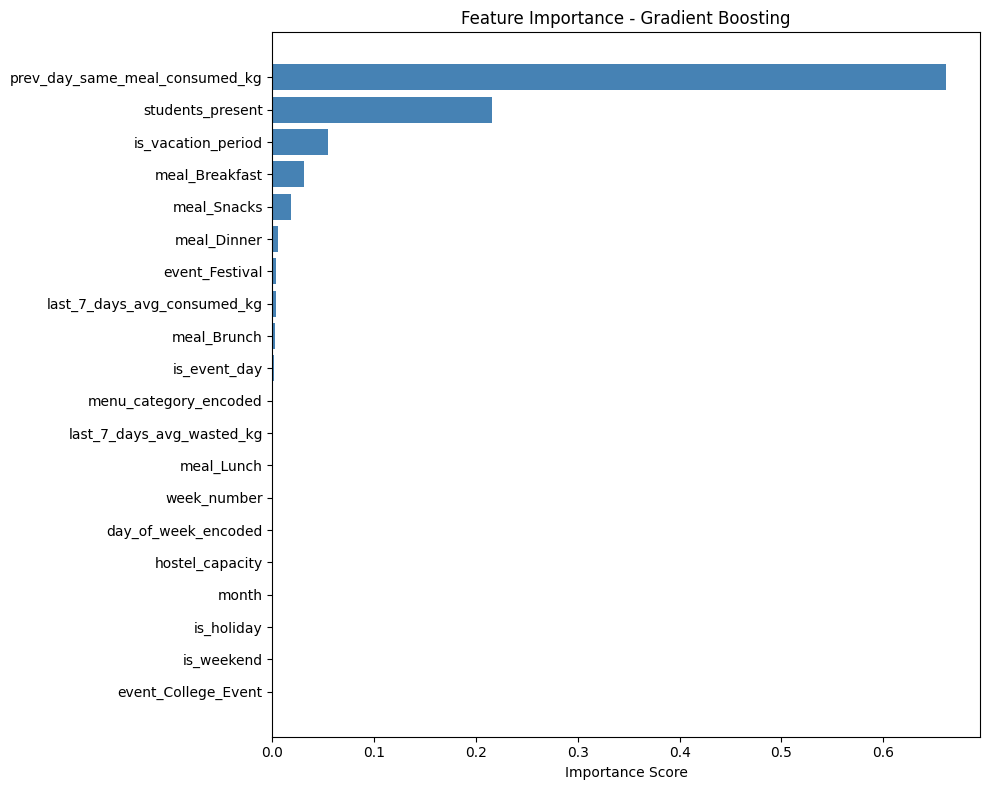

In [ ]:
# Feature importance from final model
feature_importance_df = pd.DataFrame({
    'feature': X_train_clean.columns.tolist(),
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance_df)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Testing and Evaluation

Model Performance Metrics:
MAE  : 6.265 kg
RMSE : 9.3195 kg
R2   : 0.9946
MAPE : 3.7312 %
Overall Model Accuracy : 96.27%

Predictions within 5kg  : 809/1410 (57.38%)
Predictions within 10kg : 1133/1410 (80.35%)
Predictions within 15kg : 1276/1410 (90.5%)


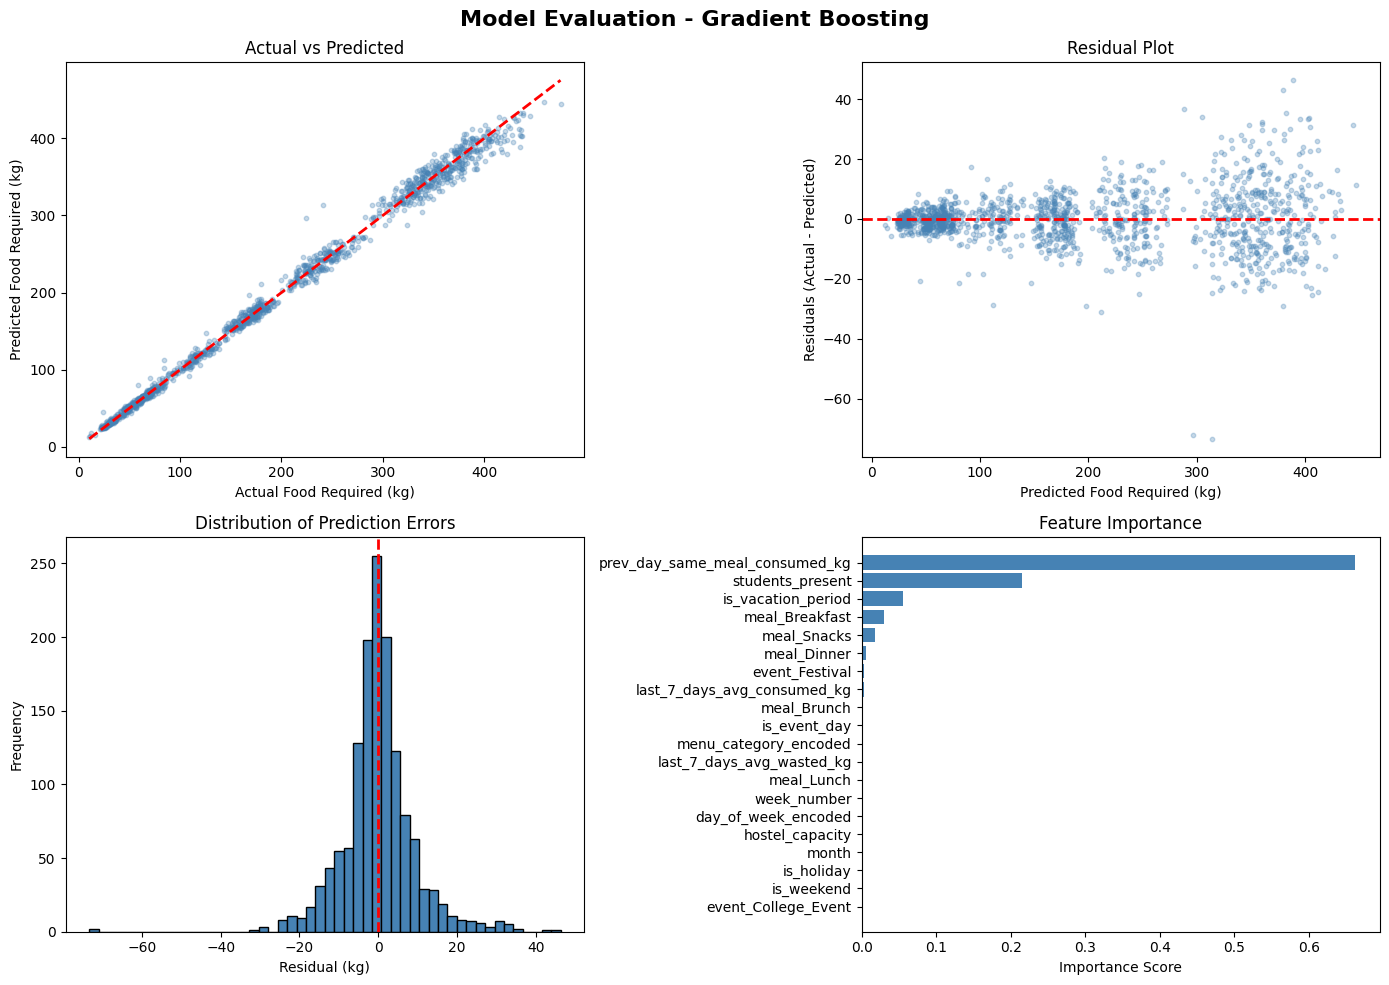

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred_final = final_model.predict(X_test_clean)

# Core metrics
mae  = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2   = r2_score(y_test, y_pred_final)
mape = mean_absolute_percentage_error(y_test, y_pred_final) * 100

print("Model Performance Metrics:")
print(f"MAE  : {round(mae, 4)} kg")
print(f"RMSE : {round(rmse, 4)} kg")
print(f"R2   : {round(r2, 4)}")
print(f"MAPE : {round(mape, 4)} %")
# Overall accuracy as a percentage
accuracy = 100 - mape
print(f"Overall Model Accuracy : {round(accuracy, 2)}%")
# Acceptable range
residuals = y_test - y_pred_final
within_5kg  = (np.abs(residuals) <= 5).sum()
within_10kg = (np.abs(residuals) <= 10).sum()
within_15kg = (np.abs(residuals) <= 15).sum()
print(f"\nPredictions within 5kg  : {within_5kg}/{len(y_test)} ({round(within_5kg/len(y_test)*100, 2)}%)")
print(f"Predictions within 10kg : {within_10kg}/{len(y_test)} ({round(within_10kg/len(y_test)*100, 2)}%)")
print(f"Predictions within 15kg : {within_15kg}/{len(y_test)} ({round(within_15kg/len(y_test)*100, 2)}%)")

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation - Gradient Boosting', fontsize=16, fontweight='bold')

# Plot 1 - Actual vs Predicted
axes[0,0].scatter(y_test, y_pred_final, alpha=0.3, color='steelblue', s=10)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0,0].set_xlabel('Actual Food Required (kg)')
axes[0,0].set_ylabel('Predicted Food Required (kg)')
axes[0,0].set_title('Actual vs Predicted')

# Plot 2 - Residual Plot
axes[0,1].scatter(y_pred_final, residuals, alpha=0.3, color='steelblue', s=10)
axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0,1].set_xlabel('Predicted Food Required (kg)')
axes[0,1].set_ylabel('Residuals (Actual - Predicted)')
axes[0,1].set_title('Residual Plot')

# Plot 3 - Distribution of Errors
axes[1,0].hist(residuals, bins=50, color='steelblue', edgecolor='black')
axes[1,0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Residual (kg)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Prediction Errors')

# Plot 4 - Feature Importance
axes[1,1].barh(feature_importance_df['feature'], feature_importance_df['importance'], color='steelblue')
axes[1,1].set_xlabel('Importance Score')
axes[1,1].set_title('Feature Importance')
axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Test set already has leaky columns removed in X_test_clean
# Run predictions on test set
y_pred_test = final_model.predict(X_test_clean)

# Compare predictions with actual ground truth
comparison_df = pd.DataFrame({
    'Actual_food_required_kg'   : y_test.values,
    'Predicted_food_required_kg': y_pred_test.round(2),
    'Difference_kg'             : (y_test.values - y_pred_test).round(2),
    'Abs_Difference_kg'         : np.abs(y_test.values - y_pred_test).round(2)
})

print(f"Total test samples : {len(comparison_df)}")
print(f"\nSample predictions:")
print(comparison_df.head(20))

print(f"\nSummary:")
print(f"Average error : {comparison_df['Abs_Difference_kg'].mean().round(2)} kg")
print(f"Max error     : {round(comparison_df['Abs_Difference_kg'].max(), 2)} kg")
print(f"Min error     : {round(comparison_df['Abs_Difference_kg'].min(), 2)} kg")
print(f"Median error  : {round(comparison_df['Abs_Difference_kg'].median(), 2)} kg")

Total test samples : 1410

Sample predictions:
    Actual_food_required_kg  Predicted_food_required_kg  Difference_kg  \
0                247.468742                      243.03           4.44   
1                175.631840                      177.78          -2.15   
2                 66.033979                       65.43           0.60   
3                 52.931935                       47.80           5.13   
4                392.394858                      359.94          32.45   
5                353.251557                      361.51          -8.25   
6                114.273711                      109.64           4.63   
7                369.893840                      362.74           7.15   
8                150.819475                      158.17          -7.35   
9                375.325220                      370.67           4.66   
10               365.137817                      355.41           9.73   
11               179.477983                      181.40          

In [ ]:
import joblib
import os
from google.colab import files

# Create folder
save_path = '/content/drive/MyDrive/Food Waste Management System/model/'
os.makedirs(save_path, exist_ok=True)

# Save feature names
feature_names = X_train_clean.columns.tolist()

# Save to Google Drive
joblib.dump(final_model, save_path + 'final_model_FWMS.pkl')
joblib.dump(feature_names, save_path + 'feature_names_FWMS.pkl')
print("Saved to Google Drive successfully.")

# Download to local machine
joblib.dump(final_model, 'final_model_FWMS.pkl')
joblib.dump(feature_names, 'feature_names_FWMS.pkl')
files.download('final_model_FWMS.pkl')
files.download('feature_names_FWMS.pkl')
print("Download initiated.")

Saved to Google Drive successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated.
